<a href="https://colab.research.google.com/github/iwanaminami/tokuronX2022/blob/main/SIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SIR model
感染症の流行過程を記述するモデル  

$$
\begin{cases}
\frac{dS(t)}{dt} = -\beta S(t) I(t)\\
\frac{dI(t)}{dt} = \beta S(t) I(t) - \gamma I(t)\\
\frac{dR(t)}{dt} = \gamma I(t)
\end{cases}
$$

## 変数  

$S(t)$: 感受性保持者（susceptible）  
$I(t)$: 感染性保持者（Infectious）  
$R(t)$: 回復者（Recovered） or 隔離者（Removed）  

## パラメータ

$\beta$: 感染性（感染力）  
$\gamma$: 回復率  
$T(0)$: 感受性保持者の初期値（最初の時刻の時の値） 

## 以下参考

### 基本再生産数

$R_0$: 基本再生産数
$$
R_0=\frac{\beta S(0)}{\gamma}
$$
  
$z=\frac{R(\infty)}{S(\infty)+I(\infty)+R(\infty)}$: 最終規模（final size）  
  
### 最終規模方程式（final size equation）  

$R_0$と最終規模の関係
$$
1-z=\exp(-zR_0)
$$
  
$$
R_0=-\frac{\ln(1-z)}{z}
$$

### 接触を減らす
（＝$\beta$を小さくする）

時刻$t$について  
$t<t_\varepsilon$のとき、$\varepsilon = 0$  
$t≥t_\varepsilon$のとき、$0 < \varepsilon <1$  

$$
\begin{cases}
\frac{dS(t)}{dt} = -(1-\varepsilon)\beta S(t) I(t)\\
\frac{dI(t)}{dt} = (1-\varepsilon)\beta S(t) I(t) - \gamma I(t)\\
\frac{dR(t)}{dt} = \gamma I(t)
\end{cases}
$$

In [1]:
# ライブラリの読み込み
# 最初に1回だけ実行

import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [ ]:
# データの読み込み
# 最初に1回だけ実行

data_infected = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv")

In [12]:
data_infected

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020-01-16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2022-04-14,55210,2768,430,432,598,357,257,732,1273,...,340,180,2755,535,449,743,456,684,672,1426
820,2022-04-15,49711,2605,479,302,507,362,215,595,1318,...,330,144,2577,492,524,720,421,635,628,1530
821,2022-04-16,47543,2457,418,357,567,296,192,556,1034,...,275,147,2383,534,394,646,320,654,713,1439
822,2022-04-17,39214,2113,294,340,415,247,185,446,971,...,197,129,1996,248,346,475,274,548,662,1315


<BarContainer object of 824 artists>

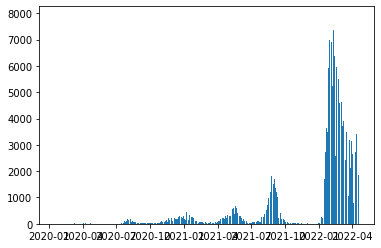

In [19]:
plt.bar(data_infected['Date'], data_infected['Aichi'])

In [23]:
# データの整形

data_infected['Date'] = pd.to_datetime(data_infected['Date'], format = "%Y/%m/%d")

data_infected_aichi = data_infected[['Date', 'Aichi']]
time_start = datetime.datetime(2022,1,1) #最初の日
time_end = datetime.datetime(2022,4,10) #最後の日
data_infected_aichi_6th = data_infected_aichi.query('@time_start < Date < @time_end')
data_infected_aichi_6th

,Date,Aichi
717,2022-01-02,19
718,2022-01-03,21
719,2022-01-04,32
720,2022-01-05,75
721,2022-01-06,154
...,...,...
810,2022-04-05,3128
811,2022-04-06,3215
812,2022-04-07,2783
813,2022-04-08,2853


<BarContainer object of 98 artists>

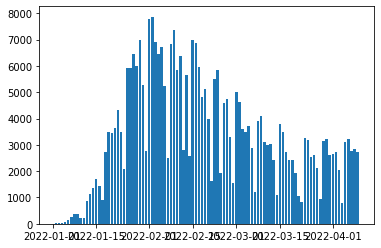

In [24]:
# データのプロット
plt.bar(data_infected_aichi_6th['Date'], data_infected_aichi_6th['Aichi'])

基本再生産数は 4.8 です


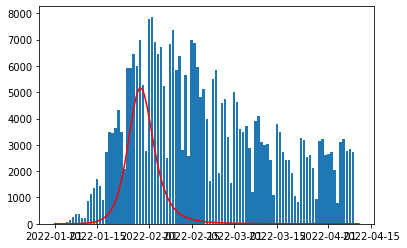

In [71]:
# メイン

# SIRモデル
beta = 0.000008 # 0.000008, 変えてみる
gamma = 0.1 # 0.1, 変えてみる
x0 = 60000 # 60000, 変えてみる
y0 = 1
z0 = 0
epsilon = 0.8 # 0.8, 0〜1, 後で変えてみる
epsilon_start = 1000 # 1000, 〜100, 後で変えてみる

r0 = beta*x0/gamma
print("基本再生産数は",r0,"です")

dt = 0.01
t = 0
x = x0
y = y0
z = z0
xList = [x]
yList = [y]
zList = [z]
tList = [t]
newinfList = [beta*x*y]
for i in range(10000):
    t = dt*(i+1)

    if t < epsilon_start:
      xx = x + dt*(-beta*x*y)
      yy = y + dt*(beta*x*y-gamma*y)
      zz = z + dt*(gamma*y)
    else:
      xx = x + dt*(-(1 - epsilon)*beta*x*y)
      yy = y + dt*((1 - epsilon)*beta*x*y-gamma*y)
      zz = z + dt*(gamma*y)
    
    x = xx
    y=yy
    z=zz
    tList.append(t)
    xList.append(x)
    yList.append(y)
    zList.append(z)
    newinfList.append(beta*x*y)

# プロット
tList = [time_start + datetime.timedelta(days = i) for i in tList]
if epsilon_start < 100:
  plt.axvspan(time_start + datetime.timedelta(days = epsilon_start), time_start + datetime.timedelta(days = 100), color="gray", alpha=0.3)
plt.bar(data_infected_aichi_6th['Date'], data_infected_aichi_6th['Aichi'])
plt.plot(tList, newinfList, color="#ff0000")

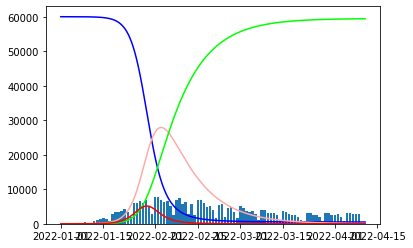

In [70]:
# 全てプロット
# 新規感染者は赤

plt.bar(data_infected_aichi_6th['Date'], data_infected_aichi_6th['Aichi'])
plt.plot(tList, xList, color="#0000ff")
plt.plot(tList, yList, color="#ffaaaa")
plt.plot(tList, zList, color="#00ff00")
plt.plot(tList, newinfList, color="#ff0000")